# ENEM 2019 - Experimento Machine Learning - Análise Exploratória de Dados

## Análise Exploratória de Dados
Esta é uma técnica inicial muito comum e, ao mesmo tempo, essencial para qualquer trabalho de machine learning.

O objetivo é entender como os dados estão organizados, conhecer cada **feature** em termos de distribuição, presença de dados **missing**, **outliers** e medidas estatisticas que detalhem melhor os dados.

### Carregando o conjunto de dados e avaliando a estrutura

In [1]:
import pandas as pd

### Explorando os dados
Após o pré-processamento temos agora uma base com 53 colunas (uma redução de 61% no número) e cerca de 3,7M de casos (aproximadamente 73% do conjunto original).

Agora o passo seguinte é explorar as variáveis do conjunto de dados.

Para este conjunto ajustado consideraremos a coluna `NU_NOTA_REDACAO` como variável **dependente**. Esta definição é importante, pois os algorítmos de classificação e regressão necessitam desta variável.



In [17]:
enem2019_dados = pd.read_csv("C:/Sandbox/MICRODADOS_ENEM_2019_final.csv",  encoding = "ISO-8859-1", sep=',')

Transformando dados string em categorias

In [18]:
categoricos = ['SG_UF_RESIDENCIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 
               'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC',
               'TP_SIT_FUNC_ESC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 
               'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015',
               'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025'
              ]

for campos in categoricos:
    enem2019_dados[campos] = enem2019_dados[campos].astype("category")

Sumário estatístico para entender os grandes números

In [24]:
enem2019_dados['NU_NOTA_REDACAO'].describe()

count    3.702007e+06
mean     5.797694e+02
std      1.825116e+02
min      0.000000e+00
25%      5.000000e+02
50%      5.800000e+02
75%      6.800000e+02
max      1.000000e+03
Name: NU_NOTA_REDACAO, dtype: float64

Seguido por uma Análise de distribuição

In [48]:
import matplotlib.pyplot as plt

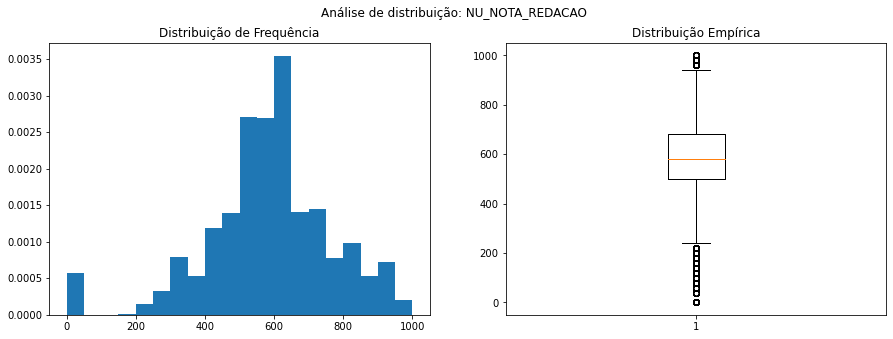

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle('Análise de distribuição: NU_NOTA_REDACAO')

axs[0].set_title('Distribuição de Frequência')
axs[0].hist(enem2019_dados['NU_NOTA_REDACAO'],  bins=20, density=True)
axs[1].set_title('Distribuição Empírica')
axs[1].boxplot(enem2019_dados['NU_NOTA_REDACAO'])

plt.show()

E um descritivo estatístico da variável

In [46]:
import statsmodels.api as sm
import statsmodels.stats.descriptivestats as smdesc
smdesc.describe(enem2019_dados['NU_NOTA_REDACAO'])

,NU_NOTA_REDACAO
nobs,3.702007e+06
missing,0.000000e+00
mean,5.797694e+02
std_err,4.930073e-05
upper_ci,5.797695e+02
lower_ci,5.797693e+02
std,1.825116e+02
iqr,1.800000e+02
iqr_normal,1.334342e+02
mad,1.326036e+02


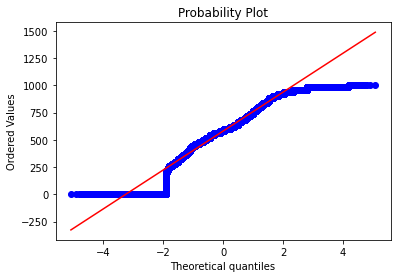

In [52]:
from scipy import stats
stats.probplot(enem2019_dados['NU_NOTA_REDACAO'], plot=plt)
plt.show()